### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

#### Collect Fashion mnist data from tf.keras.datasets 

In [3]:
import keras

Using TensorFlow backend.


In [4]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


#### Change train and test labels into one-hot vectors

In [0]:
# change the dtype to 'float64' 
import numpy as np
x_train = np.array(x_train).astype('float32')
x_test = np.array(x_test).astype('float32')

In [0]:
y_train_nrm = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_nrm = tf.keras.utils.to_categorical(y_test, num_classes=10)

#### Build the Graph

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


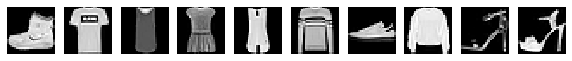

In [7]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train_nrm[0:10][i])))
plt.show()

#### Initialize model, reshape & normalize data

In [0]:
tf.keras.backend.clear_session()
#Initialize model
model1 = tf.keras.models.Sequential()
#Reshape data from 1D (784) to 3D (784, 1,)
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
#normalize data
model1.add(tf.keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
#Add 1st hidden layer
model1.add(tf.keras.layers.Dense(200, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.25))


#Add 2nd hidden layer
model1.add(tf.keras.layers.Dense(100, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Add OUTPUT layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
#adam_optim=tf.keras.optimizers.Adam(lr=1)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Training the model
model1.fit(x_train,y_train_nrm, validation_data=(x_test,y_test_nrm), epochs=10, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.5685 - accuracy: 0.7963 - val_loss: 0.4162 - val_accuracy: 0.8429
Epoch 2/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.4410 - accuracy: 0.8411 - val_loss: 0.3837 - val_accuracy: 0.8610
Epoch 3/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.4045 - accuracy: 0.8533 - val_loss: 0.3770 - val_accuracy: 0.8609
Epoch 4/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3769 - accuracy: 0.8627 - val_loss: 0.3463 - val_accuracy: 0.8728
Epoch 5/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3626 - accuracy: 0.8663 - val_loss: 0.3529 - val_accuracy: 0.8712
Epoch 6/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.3512 - accuracy: 0.8713 - val_loss: 0.3601 - val_accuracy: 0.8719
Epoch 7/10
60000/60000 [====================